In [1]:
import pyarrow.parquet as pq
import pyarrow as pa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Config
MIN_COUNT_RATING = 100
TEST_SIZE = 0.2
VALIDATION_SIZE = 0.2
RANDOM_STATE = 42

In [3]:
# Read the parquet file
df = pq.read_table('./data/annually_rating_2.parquet').to_pandas()

In [4]:
# Show the first 10 rows
df.head(10)

,Vintage,WineID,WineryID,RegionID,Year,AverageRating,MinRating,MaxRating,CountRating,WineName,Type,Elaborate,ABV,Body,Acidity
0,1988,100001,10001,1001,2015,3.000000,3.0,3.0,1,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High
1,1988,100001,10001,1001,2017,5.000000,5.0,5.0,1,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High
2,1999,100001,10001,1001,2017,4.500000,4.0,5.0,2,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High
3,2007,100001,10001,1001,2020,2.500000,2.5,2.5,1,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High
4,2008,100001,10001,1001,2015,3.687500,1.5,5.0,16,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High
5,2008,100001,10001,1001,2014,3.416667,2.0,4.0,6,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High
6,2008,100001,10001,1001,2020,4.000000,4.0,4.0,1,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High
7,2008,100001,10001,1001,2018,3.500000,3.5,3.5,1,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High
8,2008,100001,10001,1001,2012,4.000000,4.0,4.0,1,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High
9,2008,100001,10001,1001,2016,3.617647,1.0,5.0,17,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High


In [5]:
# Show the schema
df.dtypes

Vintage           object
WineID             int32
WineryID           int32
RegionID           int32
Year               int32
AverageRating    float64
MinRating        float64
MaxRating        float64
CountRating        int64
WineName          object
Type              object
Elaborate         object
ABV              float64
Body              object
Acidity           object
dtype: object

In [6]:
# Number of rows where CountRating >= MIN_COUNT_RATING
len(df[df['CountRating'] >= MIN_COUNT_RATING])

22361

In [7]:
# Filter the dataframe
rating_df = df[df['CountRating'] >= MIN_COUNT_RATING]

In [8]:
# Cast Vintage to int
rating_df['Vintage'] = rating_df['Vintage'].astype(int)

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_18772\3620986756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['Vintage'] = rating_df['Vintage'].astype(int)


In [9]:
# Add column 'DeltaTimeRating' to the dataframe
rating_df['DeltaTimeRating'] = rating_df['Year'] - rating_df['Vintage']

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_18772\708735804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['DeltaTimeRating'] = rating_df['Year'] - rating_df['Vintage']


In [10]:
# Number of rows where DeltaTimeRating < 0
len(rating_df[rating_df['DeltaTimeRating'] < 0])

0

In [11]:
rating_df.head(10)

,Vintage,WineID,WineryID,RegionID,Year,AverageRating,MinRating,MaxRating,CountRating,WineName,Type,Elaborate,ABV,Body,Acidity,DeltaTimeRating
39,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,Espumante Moscatel,Sparkling,Varietal/100%,7.5,Medium-bodied,High,2
172,2015,100006,10000,1001,2017,3.478632,1.0,5.0,117,Reserva Cabernet Sauvignon,Red,Varietal/100%,12.5,Full-bodied,High,2
183,2017,100006,10000,1001,2019,3.580000,2.5,5.0,100,Reserva Cabernet Sauvignon,Red,Varietal/100%,12.5,Full-bodied,High,2
186,2018,100006,10000,1001,2021,3.773723,1.0,5.0,137,Reserva Cabernet Sauvignon,Red,Varietal/100%,12.5,Full-bodied,High,3
187,2018,100006,10000,1001,2020,3.800613,1.0,5.0,163,Reserva Cabernet Sauvignon,Red,Varietal/100%,12.5,Full-bodied,High,2
190,2019,100006,10000,1001,2021,3.509346,1.0,5.0,107,Reserva Cabernet Sauvignon,Red,Varietal/100%,12.5,Full-bodied,High,2
328,2017,100009,10013,1004,2019,3.269231,1.0,5.0,169,Seleção Cabernet Sauvignon-Merlot,Red,Assemblage/Bordeaux Red Blend,12.5,Full-bodied,High,2
332,2018,100009,10013,1004,2020,3.433884,1.0,5.0,242,Seleção Cabernet Sauvignon-Merlot,Red,Assemblage/Bordeaux Red Blend,12.5,Full-bodied,High,2
333,2019,100009,10013,1004,2021,3.397959,1.0,5.0,147,Seleção Cabernet Sauvignon-Merlot,Red,Assemblage/Bordeaux Red Blend,12.5,Full-bodied,High,2
334,2019,100009,10013,1004,2020,3.346154,2.0,5.0,104,Seleção Cabernet Sauvignon-Merlot,Red,Assemblage/Bordeaux Red Blend,12.5,Full-bodied,High,1


In [12]:
# print unique values of 'Elaborate'
rating_df['Elaborate'].unique()

array(['Varietal/100%', 'Assemblage/Bordeaux Red Blend',
       'Assemblage/Blend', 'Assemblage/Portuguese White Blend',
       'Assemblage/Portuguese Red Blend', 'Assemblage/Port Blend',
       'Assemblage/Rhône Red Blend', 'Assemblage/Provence Rosé Blend',
       'Assemblage/Champagne Blend', 'Assemblage/Valpolicella Red Blend',
       'Varietal/>75%', 'Assemblage/Tuscan Red Blend',
       'Assemblage/Rioja Red Blend', 'Assemblage/Cava Blend',
       'Assemblage/Meritage Red Blend'], dtype=object)

In [13]:
## Label Encoding
acid_dict = {'Low': 1, 'Medium': 2, 'High': 3}
body_dict = {'Light-bodied': 1, 'Medium-bodied': 2, 'Full-bodied': 3, 'Very full-bodied': 4}
elaborat_dict = {'Varietal/100%':1, 'Varietal/>75%': 2, 'Assemblage/Blend' : 3,
                 'Assemblage/Meritage Red Blend':4, 'Assemblage/Rhône Red Blend':5, 'Assemblage/Bordeaux Red Blend':6 , 
                 'Assemblage/Portuguese White Blend': 7, 'Assemblage/Portuguese Red Blend': 8, 'Assemblage/Port Blend': 9,  
                 'Assemblage/Provence Rosé Blend' :10, 'Assemblage/Champagne Blend': 11, 'Assemblage/Valpolicella Red Blend': 12,
                 'Assemblage/Tuscan Red Blend': 13, 'Assemblage/Rioja Red Blend': 14, 'Assemblage/Cava Blend': 15
                 }

rating_df['Body'] = rating_df['Body'].map(body_dict)
rating_df['Acidity'] = rating_df['Acidity'].map(acid_dict)
rating_df.loc[:, 'Elaborate'] = rating_df['Elaborate'].map(elaborat_dict)

rating_df.head()

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_18772\3535428072.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['Body'] = rating_df['Body'].map(body_dict)
C:\Users\bbbbb\AppData\Local\Temp\ipykernel_18772\3535428072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['Acidity'] = rating_df['Acidity'].map(acid_dict)


,Vintage,WineID,WineryID,RegionID,Year,AverageRating,MinRating,MaxRating,CountRating,WineName,Type,Elaborate,ABV,Body,Acidity,DeltaTimeRating
39,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,Espumante Moscatel,Sparkling,1,7.5,2.0,3,2
172,2015,100006,10000,1001,2017,3.478632,1.0,5.0,117,Reserva Cabernet Sauvignon,Red,1,12.5,3.0,3,2
183,2017,100006,10000,1001,2019,3.580000,2.5,5.0,100,Reserva Cabernet Sauvignon,Red,1,12.5,3.0,3,2
186,2018,100006,10000,1001,2021,3.773723,1.0,5.0,137,Reserva Cabernet Sauvignon,Red,1,12.5,3.0,3,3
187,2018,100006,10000,1001,2020,3.800613,1.0,5.0,163,Reserva Cabernet Sauvignon,Red,1,12.5,3.0,3,2


In [14]:
# Shape of the dataframe
rating_df.shape

(22361, 16)

In [15]:
weather_df = pq.read_table('./data/agg_monthly.parquet').to_pandas()
weather_df.shape

(1912752, 17)

In [16]:
# Print the first 10 rows
weather_df.head(10)

,RegionID,year,month,avg_temperature,max_temperature,min_temperature,avg_sunshine_duration,max_sunshine_duration,min_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,count_record,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,1000,1949,1,20.893548,22.9,17.4,36360.254516,46592.96,114.22,5.119355,5.119355,0.0,31,83.374497,8.215034,19.860537,0.455046
1,1000,1949,2,20.239286,23.5,15.0,39061.164286,45490.35,5610.33,2.839286,2.839286,0.0,28,80.038690,7.975744,19.858333,0.418362
2,1000,1949,3,20.719355,22.7,18.6,30877.352581,40876.61,0.00,5.893548,5.893548,0.0,31,85.978495,7.284409,20.569624,0.444293
3,1000,1949,4,15.953333,19.4,12.8,33343.093333,39559.54,0.00,2.126667,2.126667,0.0,30,82.226389,7.459028,17.799167,0.467942
4,1000,1949,5,13.887097,21.9,7.0,23280.035161,36306.69,0.00,5.925806,5.925806,0.0,31,85.336022,8.177823,15.398253,0.465198
5,1000,1949,6,15.126667,17.8,11.1,23274.051000,33531.70,0.00,1.606667,1.606667,0.0,30,85.050000,8.322222,15.577083,0.489501
6,1000,1949,7,12.309677,18.6,5.3,24589.808710,35126.91,0.00,3.477419,3.477419,0.0,31,83.344086,8.618817,13.716263,0.484792
7,1000,1949,8,12.693548,17.1,5.6,24244.251613,38593.41,0.00,4.425806,4.425806,0.0,31,84.318548,8.879301,13.183468,0.480704
8,1000,1949,9,14.150000,20.4,7.6,27633.479000,40515.45,0.00,2.700000,2.700000,0.0,30,80.055556,9.205278,13.616944,0.445733
9,1000,1949,10,14.541935,18.3,11.0,24344.522903,43788.30,0.00,6.670968,6.670968,0.0,31,83.653226,9.564919,14.525134,0.485536


In [17]:
# Join the two dataframes rating_df.RegionID == weather_df.RegionID & rating_df.Vintage == weather_df.year
merge_df = rating_df.merge(weather_df, left_on=['RegionID', 'Vintage'], right_on=['RegionID', 'year'])

In [18]:
# Shape of the dataframe
merge_df.shape

(268320, 32)

In [19]:
# Drop unnecessary columns
merge_df.drop(['count_record', 'year', 'min_sunshine_duration', 'max_sunshine_duration', 'max_temperature', 'min_temperature'], axis=1, inplace=True)
merge_df.drop(['WineName', 'Type'],axis=1, inplace=True)

In [20]:
merge_df.head(10)

,Vintage,WineID,WineryID,RegionID,Year,AverageRating,MinRating,MaxRating,CountRating,Elaborate,...,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,1,26.670968,36388.056129,4.987097,4.987097,0.0,78.767473,5.151075,27.142608,0.471441
1,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,2,25.617857,32068.925000,7.482143,7.482143,0.0,85.313988,4.650298,26.469643,0.495249
2,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,3,26.448387,38024.009677,4.154839,4.154839,0.0,82.702957,4.258333,26.694489,0.484233
3,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,4,26.430000,36712.819000,2.056667,2.056667,0.0,78.326389,5.115694,26.643611,0.470664
4,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,5,26.283871,37847.009677,0.180645,0.180645,0.0,70.458333,5.398253,26.299866,0.431762
5,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,6,25.213333,36917.356000,0.003333,0.003333,0.0,57.540278,6.759583,25.696389,0.416094
6,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,7,23.761290,38055.504194,0.000000,0.000000,0.0,48.439516,8.242608,24.558199,0.404673
7,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,8,27.364516,38346.088710,0.000000,0.000000,0.0,43.908602,6.781317,25.634274,0.402241
8,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,9,29.013333,38422.171000,0.020000,0.020000,0.0,36.404167,8.159028,27.234167,0.382358
9,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,10,28.951613,37825.997742,1.674194,1.674194,0.0,55.732527,7.054570,28.027823,0.365884


In [21]:
# Print the schema
merge_df.dtypes

Vintage                    int32
WineID                     int32
WineryID                   int32
RegionID                   int32
Year                       int32
AverageRating            float64
MinRating                float64
MaxRating                float64
CountRating                int64
Elaborate                 object
ABV                      float64
Body                     float64
Acidity                    int64
DeltaTimeRating            int32
month                      int32
avg_temperature          float64
avg_sunshine_duration    float64
avg_precipitation        float64
avg_rain                 float64
avg_snowfall             float64
avg_humidity             float64
avg_wind_speed           float64
avg_soil_temperature     float64
avg_soil_moisture        float64
dtype: object

In [22]:
merge_df

,Vintage,WineID,WineryID,RegionID,Year,AverageRating,MinRating,MaxRating,CountRating,Elaborate,...,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,1,26.670968,36388.056129,4.987097,4.987097,0.00000,78.767473,5.151075,27.142608,0.471441
1,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,2,25.617857,32068.925000,7.482143,7.482143,0.00000,85.313988,4.650298,26.469643,0.495249
2,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,3,26.448387,38024.009677,4.154839,4.154839,0.00000,82.702957,4.258333,26.694489,0.484233
3,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,4,26.430000,36712.819000,2.056667,2.056667,0.00000,78.326389,5.115694,26.643611,0.470664
4,2017,100001,10001,1001,2019,4.272727,1.0,5.0,165,1,...,5,26.283871,37847.009677,0.180645,0.180645,0.00000,70.458333,5.398253,26.299866,0.431762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268315,2020,194779,62013,2082,2021,3.881356,2.5,5.0,118,1,...,8,19.300000,34754.208065,5.116129,5.116129,0.00000,75.861559,9.876613,17.768817,0.321772
268316,2020,194779,62013,2082,2021,3.881356,2.5,5.0,118,1,...,9,15.340000,32099.546333,3.813333,3.813333,0.00000,76.262500,11.028750,16.387917,0.339878
268317,2020,194779,62013,2082,2021,3.881356,2.5,5.0,118,1,...,10,9.454839,21308.465484,3.980645,3.980645,0.00000,82.827957,12.998387,11.916532,0.386480
268318,2020,194779,62013,2082,2021,3.881356,2.5,5.0,118,1,...,11,4.483333,21144.429000,0.626667,0.566667,0.04200,83.295833,7.762361,8.575278,0.361567


## Test weather with RegionID == 1001

In [23]:
# Get weather data for RegionID == 1001
weather_1001 = merge_df[merge_df['RegionID'] == 1001]
weather_1001.shape

(1284, 24)

In [24]:
# Drop unnecessary columns
weather_1001.drop(['WineID', 'RegionID', 'WineryID', 
                   'Year', 'AverageRating', 'MinRating', 'MaxRating', 'CountRating', 'DeltaTimeRating'], axis=1, inplace=True)

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_18772\2755428269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_1001.drop(['WineID', 'RegionID', 'WineryID',


In [25]:
# Drop duplicates
weather_1001.drop_duplicates(inplace=True)

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_18772\3369880976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_1001.drop_duplicates(inplace=True)


In [26]:
weather_1001.shape

(924, 15)

In [27]:
# Show weather_1001 and order by Vintage
weather_1001.sort_values(by=['Vintage', 'month'], inplace=True)

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_18772\583815585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_1001.sort_values(by=['Vintage', 'month'], inplace=True)


In [28]:
# Add timestamp column
weather_1001['timestamp'] = pd.to_datetime(weather_1001['Vintage'].astype(str) + '-' + weather_1001['month'].astype(str) + '-01')

C:\Users\bbbbb\AppData\Local\Temp\ipykernel_18772\3358474081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_1001['timestamp'] = pd.to_datetime(weather_1001['Vintage'].astype(str) + '-' + weather_1001['month'].astype(str) + '-01')


In [29]:
# Show the first 10 rows
weather_1001.head(10)

,Vintage,Elaborate,ABV,Body,Acidity,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture,timestamp
4464,2009,3,13.0,3.0,2,1,26.435484,35032.635161,7.287097,7.287097,0.0,80.228495,5.189919,27.160349,0.493448,2009-01-01
4465,2009,3,13.0,3.0,2,2,26.239286,33484.181071,5.885714,5.885714,0.0,82.620536,4.716071,26.938244,0.495412,2009-02-01
4466,2009,3,13.0,3.0,2,3,26.574194,32427.138387,6.822581,6.822581,0.0,81.641129,4.414651,27.200941,0.476897,2009-03-01
4467,2009,3,13.0,3.0,2,4,25.493333,33239.103000,4.920000,4.920000,0.0,82.186111,4.703472,26.272361,0.482983,2009-04-01
4468,2009,3,13.0,3.0,2,5,25.887097,36186.539677,0.435484,0.435484,0.0,72.545699,5.386694,26.261022,0.413558,2009-05-01
4469,2009,3,13.0,3.0,2,6,25.646667,37126.314667,0.016667,0.016667,0.0,58.468056,6.514167,26.149444,0.380131,2009-06-01
4470,2009,3,13.0,3.0,2,7,26.861290,37715.103871,0.000000,0.000000,0.0,47.622312,6.555108,26.506452,0.360578,2009-07-01
4471,2009,3,13.0,3.0,2,8,27.854839,37132.755484,0.374194,0.374194,0.0,45.076613,7.683333,27.475538,0.345965,2009-08-01
4472,2009,3,13.0,3.0,2,9,28.300000,37997.389333,2.676667,2.676667,0.0,63.463889,6.010000,28.075694,0.336443,2009-09-01
4473,2009,3,13.0,3.0,2,10,27.803226,35240.480323,4.493548,4.493548,0.0,71.774194,5.338575,28.520833,0.336151,2009-10-01


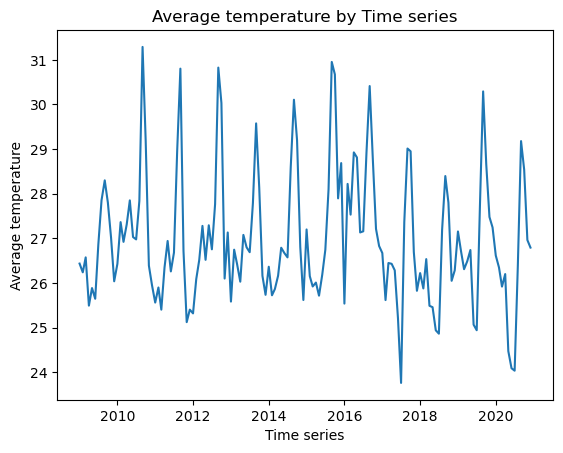

In [30]:
# Line chart for avg_temperature by Time series
plt.plot(weather_1001['timestamp'], weather_1001['avg_temperature'])
plt.xlabel('Time series')
plt.ylabel('Average temperature')
plt.title('Average temperature by Time series')
plt.show()

## Feature Engineering

In [31]:
# Apply autoscaling for column of merge_df
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

Features need to be scaled to the same range.  The following features are scaled to the range of 0 to 1.
- Elaborate                  int32
- ABV                      float64
- Body                     float64
- Acidity                    int64
- avg_temperature          float64
- avg_sunshine_duration    float64
- avg_precipitation        float64
- avg_rain                 float64
- avg_snowfall             float64
- avg_humidity             float64
- avg_wind_speed           float64
- avg_soil_temperature     float64
- avg_soil_moisture        float64

The following features are scaled by StandardScaler.
- DeltaTimeRating            int32

and drop the following features:
- Vintage
- WineID
- RegionID
- Year
- month
- MinRating
- MaxRating
- CountRating

In [32]:
col_not_normalize = ['Vintage','WineID', 'RegionID', 'WineryID', 
                     'Year', 'month', 'AverageRating', 'MinRating', 
                     'MaxRating', 'CountRating', 'DeltaTimeRating']
col_to_normalize = [col for col in merge_df.columns if col not in col_not_normalize]

merge_df_unscaled = merge_df[col_not_normalize]
merge_df_to_scale = merge_df.drop(col_not_normalize, axis=1)

# scale merge_df_to_scale with MinMaxScaler
merge_df_to_scale = minmax_scaler.fit_transform(merge_df_to_scale)

# concat two dataframe
merge_df = pd.concat([merge_df_unscaled, pd.DataFrame(merge_df_to_scale, columns=col_to_normalize)], axis=1)

# scale DeltaTimeRating with StandardScaler
merge_df['DeltaTimeRating'] = std_scaler.fit_transform(merge_df['DeltaTimeRating'].values.reshape(-1, 1))
merge_df.head(10)

,Vintage,WineID,RegionID,WineryID,Year,month,AverageRating,MinRating,MaxRating,CountRating,...,Acidity,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,2017,100001,1001,10001,2019,1,4.272727,1.0,5.0,165,...,1.0,0.842552,0.673458,0.217404,0.218801,0.0,0.795811,0.085199,0.812267,0.684211
1,2017,100001,1001,10001,2019,2,4.272727,1.0,5.0,165,...,1.0,0.821868,0.578175,0.326172,0.328267,0.0,0.878750,0.070463,0.796689,0.718764
2,2017,100001,1001,10001,2019,3,4.272727,1.0,5.0,165,...,1.0,0.838180,0.709549,0.181123,0.182287,0.0,0.845670,0.058928,0.801894,0.702776
3,2017,100001,1001,10001,2019,4,4.272727,1.0,5.0,165,...,1.0,0.837819,0.680623,0.089657,0.090233,0.0,0.790223,0.084158,0.800716,0.683084
4,2017,100001,1001,10001,2019,5,4.272727,1.0,5.0,165,...,1.0,0.834949,0.705644,0.007875,0.007926,0.0,0.690541,0.092473,0.792758,0.626625
5,2017,100001,1001,10001,2019,6,4.272727,1.0,5.0,165,...,1.0,0.813922,0.685135,0.000145,0.000146,0.0,0.526879,0.132534,0.778788,0.603886
6,2017,100001,1001,10001,2019,7,4.272727,1.0,5.0,165,...,1.0,0.785402,0.710243,0.000000,0.000000,0.0,0.411579,0.176175,0.752440,0.587310
7,2017,100001,1001,10001,2019,8,4.272727,1.0,5.0,165,...,1.0,0.856174,0.716654,0.000000,0.000000,0.0,0.354176,0.133173,0.777350,0.583780
8,2017,100001,1001,10001,2019,9,4.272727,1.0,5.0,165,...,1.0,0.888559,0.718332,0.000872,0.000877,0.0,0.259101,0.173716,0.814387,0.554924
9,2017,100001,1001,10001,2019,10,4.272727,1.0,5.0,165,...,1.0,0.887347,0.705180,0.072984,0.073453,0.0,0.503976,0.141214,0.832759,0.531015


In [33]:
col_to_normalize

['Elaborate',
 'ABV',
 'Body',
 'Acidity',
 'avg_temperature',
 'avg_sunshine_duration',
 'avg_precipitation',
 'avg_rain',
 'avg_snowfall',
 'avg_humidity',
 'avg_wind_speed',
 'avg_soil_temperature',
 'avg_soil_moisture']

In [34]:
merge_df['DeltaTimeRating']

0        -0.459764
1        -0.459764
2        -0.459764
3        -0.459764
4        -0.459764
            ...   
268315   -0.895371
268316   -0.895371
268317   -0.895371
268318   -0.895371
268319   -0.895371
Name: DeltaTimeRating, Length: 268320, dtype: float64

In [35]:
#save minmax_scaler and std_scaler to use later for prediction
import joblib
with open('./model/minmax_scaler.save', 'wb') as f:
    joblib.dump(minmax_scaler, f)

with open('./model/std_scaler.save', 'wb') as f:
    joblib.dump(std_scaler, f)


In [36]:
merge_df.sort_values(by=['WineID', 'Vintage', 'Year', 'month'], inplace=True)

In [37]:
# Show the first 10 rows
merge_df.head(10)

,Vintage,WineID,RegionID,WineryID,Year,month,AverageRating,MinRating,MaxRating,CountRating,...,Acidity,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,2017,100001,1001,10001,2019,1,4.272727,1.0,5.0,165,...,1.0,0.842552,0.673458,0.217404,0.218801,0.0,0.795811,0.085199,0.812267,0.684211
1,2017,100001,1001,10001,2019,2,4.272727,1.0,5.0,165,...,1.0,0.821868,0.578175,0.326172,0.328267,0.0,0.878750,0.070463,0.796689,0.718764
2,2017,100001,1001,10001,2019,3,4.272727,1.0,5.0,165,...,1.0,0.838180,0.709549,0.181123,0.182287,0.0,0.845670,0.058928,0.801894,0.702776
3,2017,100001,1001,10001,2019,4,4.272727,1.0,5.0,165,...,1.0,0.837819,0.680623,0.089657,0.090233,0.0,0.790223,0.084158,0.800716,0.683084
4,2017,100001,1001,10001,2019,5,4.272727,1.0,5.0,165,...,1.0,0.834949,0.705644,0.007875,0.007926,0.0,0.690541,0.092473,0.792758,0.626625
5,2017,100001,1001,10001,2019,6,4.272727,1.0,5.0,165,...,1.0,0.813922,0.685135,0.000145,0.000146,0.0,0.526879,0.132534,0.778788,0.603886
6,2017,100001,1001,10001,2019,7,4.272727,1.0,5.0,165,...,1.0,0.785402,0.710243,0.000000,0.000000,0.0,0.411579,0.176175,0.752440,0.587310
7,2017,100001,1001,10001,2019,8,4.272727,1.0,5.0,165,...,1.0,0.856174,0.716654,0.000000,0.000000,0.0,0.354176,0.133173,0.777350,0.583780
8,2017,100001,1001,10001,2019,9,4.272727,1.0,5.0,165,...,1.0,0.888559,0.718332,0.000872,0.000877,0.0,0.259101,0.173716,0.814387,0.554924
9,2017,100001,1001,10001,2019,10,4.272727,1.0,5.0,165,...,1.0,0.887347,0.705180,0.072984,0.073453,0.0,0.503976,0.141214,0.832759,0.531015


In [38]:
new_merge_df = pd.DataFrame()

In [39]:
list_vintage = merge_df['Vintage'].tolist()
new_merge_df['Vintage'] = list_vintage[0::12]

list_wine_id = merge_df['WineID'].tolist()
new_merge_df['WineID'] = list_wine_id[0::12]

list_winery_id = merge_df['WineryID'].tolist()
new_merge_df['WineryID'] = list_winery_id[0::12]

list_region_id = merge_df['RegionID'].tolist()
new_merge_df['RegionID'] = list_region_id[0::12]

list_year = merge_df['Year'].tolist()
new_merge_df['Year'] = list_year[0::12]

list_average_rating = merge_df['AverageRating'].tolist()
new_merge_df['AverageRating'] = list_average_rating[0::12]

list_delta_time_rating = merge_df['DeltaTimeRating'].tolist()
new_merge_df['DeltaTimeRating'] = list_delta_time_rating[0::12]

list_ABV = merge_df['ABV'].tolist()
new_merge_df['ABV'] = list_ABV[0::12]

list_body = merge_df['Body'].tolist()
new_merge_df['Body'] = list_body[0::12]

list_acidity = merge_df['Acidity'].tolist()
new_merge_df['Acidity'] = list_acidity[0::12]

list_elaborate = merge_df['Elaborate'].tolist()
new_merge_df['Elaborate'] = list_elaborate[0::12]

In [40]:
# month: list of 12 values from index to index + 12
list_month = merge_df['month'].tolist()
list_month = [list_month[i:i + 12] for i in range(0, len(list_month), 12)]
new_merge_df['month'] = list_month

# avg_temperature: list of 12 values from index to index + 12
list_avg_temperature = merge_df['avg_temperature'].tolist()
list_avg_temperature = [list_avg_temperature[i:i + 12] for i in range(0, len(list_avg_temperature), 12)]
new_merge_df['avg_temperature'] = list_avg_temperature

# avg_sunshine_duration: list of 12 values from index to index + 12
list_avg_sunshine_duration = merge_df['avg_sunshine_duration'].tolist()
list_avg_sunshine_duration = [list_avg_sunshine_duration[i:i + 12] for i in range(0, len(list_avg_sunshine_duration), 12)]
new_merge_df['avg_sunshine_duration'] = list_avg_sunshine_duration
                            
# avg_precipitation: list of 12 values from index to index + 12
list_avg_precipitation = merge_df['avg_precipitation'].tolist()
list_avg_precipitation = [list_avg_precipitation[i:i + 12] for i in range(0, len(list_avg_precipitation), 12)]
new_merge_df['avg_precipitation'] = list_avg_precipitation

# avg_rain: list of 12 values from index to index + 12
list_avg_rain = merge_df['avg_rain'].tolist()
list_avg_rain = [list_avg_rain[i:i + 12] for i in range(0, len(list_avg_rain), 12)]
new_merge_df['avg_rain'] = list_avg_rain

# avg_snowfall: list of 12 values from index to index + 12
list_avg_snowfall = merge_df['avg_snowfall'].tolist()
list_avg_snowfall = [list_avg_snowfall[i:i + 12] for i in range(0, len(list_avg_snowfall), 12)]
new_merge_df['avg_snowfall'] = list_avg_snowfall

# avg_humidity: list of 12 values from index to index + 12
list_avg_humidity = merge_df['avg_humidity'].tolist()
list_avg_humidity = [list_avg_humidity[i:i + 12] for i in range(0, len(list_avg_humidity), 12)]
new_merge_df['avg_humidity'] = list_avg_humidity

# avg_wind_speed: list of 12 values from index to index + 12
list_avg_wind_speed = merge_df['avg_wind_speed'].tolist()
list_avg_wind_speed = [list_avg_wind_speed[i:i + 12] for i in range(0, len(list_avg_wind_speed), 12)]
new_merge_df['avg_wind_speed'] = list_avg_wind_speed

# avg_soil_temperature: list of 12 values from index to index + 12
list_avg_soil_temperature = merge_df['avg_soil_temperature'].tolist()
list_avg_soil_temperature = [list_avg_soil_temperature[i:i + 12] for i in range(0, len(list_avg_soil_temperature), 12)]
new_merge_df['avg_soil_temperature'] = list_avg_soil_temperature

# avg_soil_moisture: list of 12 values from index to index + 12
list_avg_soil_moisture = merge_df['avg_soil_moisture'].tolist()
list_avg_soil_moisture = [list_avg_soil_moisture[i:i + 12] for i in range(0, len(list_avg_soil_moisture), 12)]
new_merge_df['avg_soil_moisture'] = list_avg_soil_moisture

In [41]:
# Show first 10 rows of new_merge_df
new_merge_df.head(10)

,Vintage,WineID,WineryID,RegionID,Year,AverageRating,DeltaTimeRating,ABV,Body,Acidity,...,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,2017,100001,10001,1001,2019,4.272727,-0.459764,0.166667,0.333333,1.0,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8425521130330104, 0.8218675609380799, 0.838...","[0.6734582663220409, 0.5781750151785042, 0.709...","[0.21740418757188135, 0.32617157091701704, 0.1...","[0.21880086129335535, 0.3282670009401442, 0.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7958109833971903, 0.8787502280605729, 0.845...","[0.08519936961681214, 0.07046279801785636, 0.0...","[0.8122671616549405, 0.7966885435394488, 0.801...","[0.6842111973265387, 0.7187637006049298, 0.702..."
1,2015,100006,10000,1001,2017,3.478632,-0.459764,0.500000,0.666667,1.0,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8529430399797251, 0.8323897321711426, 0.827...","[0.755637915196389, 0.5606540562201561, 0.5836...","[0.1494829569139132, 0.29627899735326174, 0.27...","[0.1504432830238271, 0.2981823879661548, 0.274...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7711707109408259, 0.833427598370127, 0.8517...","[0.0780679775748488, 0.09643508373664599, 0.06...","[0.8258548921152458, 0.816355059856087, 0.8020...","[0.6677219477969564, 0.6855086204476204, 0.717..."
2,2017,100006,10000,1001,2019,3.580000,-0.459764,0.500000,0.666667,1.0,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8425521130330104, 0.8218675609380799, 0.838...","[0.6734582663220409, 0.5781750151785042, 0.709...","[0.21740418757188135, 0.32617157091701704, 0.1...","[0.21880086129335535, 0.3282670009401442, 0.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7958109833971903, 0.8787502280605729, 0.845...","[0.08519936961681214, 0.07046279801785636, 0.0...","[0.8122671616549405, 0.7966885435394488, 0.801...","[0.6842111973265387, 0.7187637006049298, 0.702..."
3,2018,100006,10000,1001,2020,3.800613,-0.459764,0.500000,0.666667,1.0,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8337451688525629, 0.8269883509381705, 0.839...","[0.619721813718897, 0.5726836150994736, 0.6643...","[0.19363878802489043, 0.3484353106025221, 0.21...","[0.19488278525287858, 0.35067376997806315, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8121072796934864, 0.8567676214802652, 0.836...","[0.08302395884416637, 0.08239577366845528, 0.0...","[0.800291165652724, 0.7948352267101638, 0.8020...","[0.6898604185069132, 0.7176946484762262, 0.697..."
4,2018,100006,10000,1001,2021,3.773723,-0.024157,0.500000,0.666667,1.0,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8337451688525629, 0.8269883509381705, 0.839...","[0.619721813718897, 0.5726836150994736, 0.6643...","[0.19363878802489043, 0.3484353106025221, 0.21...","[0.19488278525287858, 0.35067376997806315, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8121072796934864, 0.8567676214802652, 0.836...","[0.08302395884416637, 0.08239577366845528, 0.0...","[0.800291165652724, 0.7948352267101638, 0.8020...","[0.6898604185069132, 0.7176946484762262, 0.697..."
5,2019,100006,10000,1001,2021,3.509346,-0.459764,0.500000,0.666667,1.0,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8520560096306153, 0.8429820512124256, 0.835...","[0.6992997392875369, 0.6478904365677511, 0.657...","[0.09913968450076087, 0.2178109917484042, 0.27...","[0.0997765893996219, 0.2192102789094328, 0.275...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7433120476798638, 0.8144426199598614, 0.864...","[0.0861288633105786, 0.07876552162649318, 0.07...","[0.8114332913175571, 0.8126346468902472, 0.802...","[0.6450626407419842, 0.6512967926276474, 0.709..."
6,2017,100009,10013,1004,2019,3.269231,-0.459764,0.500000,0.666667,1.0,...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.7575872774504215, 0.7677836008001375, 0.729...","[0.5022648414944, 0.7558886569142231, 0.601755...","[0.5437917162616205, 0.1577

In [42]:
# Drop unnecessary columns
model_data = new_merge_df.drop(['Vintage', 'WineID', 'WineryID', 
                                'RegionID', 'Year', 'month'], axis=1)

In [43]:
# Show the first 20 rows
model_data.head(20)

,AverageRating,DeltaTimeRating,ABV,Body,Acidity,Elaborate,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,4.272727,-0.459764,0.166667,0.333333,1.0,0.000000,"[0.8425521130330104, 0.8218675609380799, 0.838...","[0.6734582663220409, 0.5781750151785042, 0.709...","[0.21740418757188135, 0.32617157091701704, 0.1...","[0.21880086129335535, 0.3282670009401442, 0.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7958109833971903, 0.8787502280605729, 0.845...","[0.08519936961681214, 0.07046279801785636, 0.0...","[0.8122671616549405, 0.7966885435394488, 0.801...","[0.6842111973265387, 0.7187637006049298, 0.702..."
1,3.478632,-0.459764,0.500000,0.666667,1.0,0.000000,"[0.8529430399797251, 0.8323897321711426, 0.827...","[0.755637915196389, 0.5606540562201561, 0.5836...","[0.1494829569139132, 0.29627899735326174, 0.27...","[0.1504432830238271, 0.2981823879661548, 0.274...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7711707109408259, 0.833427598370127, 0.8517...","[0.0780679775748488, 0.09643508373664599, 0.06...","[0.8258548921152458, 0.816355059856087, 0.8020...","[0.6677219477969564, 0.6855086204476204, 0.717..."
2,3.580000,-0.459764,0.500000,0.666667,1.0,0.000000,"[0.8425521130330104, 0.8218675609380799, 0.838...","[0.6734582663220409, 0.5781750151785042, 0.709...","[0.21740418757188135, 0.32617157091701704, 0.1...","[0.21880086129335535, 0.3282670009401442, 0.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7958109833971903, 0.8787502280605729, 0.845...","[0.08519936961681214, 0.07046279801785636, 0.0...","[0.8122671616549405, 0.7966885435394488, 0.801...","[0.6842111973265387, 0.7187637006049298, 0.702..."
3,3.800613,-0.459764,0.500000,0.666667,1.0,0.000000,"[0.8337451688525629, 0.8269883509381705, 0.839...","[0.619721813718897, 0.5726836150994736, 0.6643...","[0.19363878802489043, 0.3484353106025221, 0.21...","[0.19488278525287858, 0.35067376997806315, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8121072796934864, 0.8567676214802652, 0.836...","[0.08302395884416637, 0.08239577366845528, 0.0...","[0.800291165652724, 0.7948352267101638, 0.8020...","[0.6898604185069132, 0.7176946484762262, 0.697..."
4,3.773723,-0.024157,0.500000,0.666667,1.0,0.000000,"[0.8337451688525629, 0.8269883509381705, 0.839...","[0.619721813718897, 0.5726836150994736, 0.6643...","[0.19363878802489043, 0.3484353106025221, 0.21...","[0.19488278525287858, 0.35067376997806315, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8121072796934864, 0.8567676214802652, 0.836...","[0.08302395884416637, 0.08239577366845528, 0.0...","[0.800291165652724, 0.7948352267101638, 0.8020...","[0.6898604185069132, 0.7176946484762262, 0.697..."
5,3.509346,-0.459764,0.500000,0.666667,1.0,0.000000,"[0.8520560096306153, 0.8429820512124256, 0.835...","[0.6992997392875369, 0.6478904365677511, 0.657...","[0.09913968450076087, 0.2178109917484042, 0.27...","[0.0997765893996219, 0.2192102789094328, 0.275...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7433120476798638, 0.8144426199598614, 0.864...","[0.0861288633105786, 0.07876552162649318, 0.07...","[0.8114332913175571, 0.8126346468902472, 0.802...","[0.6450626407419842, 0.6512967926276474, 0.709..."
6,3.269231,-0.459764,0.500000,0.666667,1.0,0.357143,"[0.7575872774504215, 0.7677836008001375, 0.729...","[0.5022648414944, 0.7558886569142231, 0.601755...","[0.5437917162616205, 0.15771446364627126, 0.19...","[0.5472852073877136, 0.15872767157630838, 0.19...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8681140911025967, 0.7896132092683816, 0.873...","[0.17555011194324788, 0.17948421519118152, 0.2...","[0.7269323561582033, 0.7350709262061427, 0.727...","[0.6454527803262605, 0.6819537521570004, 0.662..."
7,3.433884,-0.459764,0.500000,0.666667,1.0,0.357143,"[0.742697839447507, 0.7289217150460261, 0.7547...","[0.5461789536904538, 0.5785561854606548, 0.585...","

In [44]:
model_data.dtypes

AverageRating            float64
DeltaTimeRating          float64
ABV                      float64
Body                     float64
Acidity                  float64
Elaborate                float64
avg_temperature           object
avg_sunshine_duration     object
avg_precipitation         object
avg_rain                  object
avg_snowfall              object
avg_humidity              object
avg_wind_speed            object
avg_soil_temperature      object
avg_soil_moisture         object
dtype: object

# Try the numpy array approach

In [45]:
list_avg_temperature = merge_df['avg_temperature'].tolist()
list_avg_sunshine_duration = merge_df['avg_sunshine_duration'].tolist()
list_avg_precipitation = merge_df['avg_precipitation'].tolist()
list_avg_rain = merge_df['avg_rain'].tolist()
list_avg_snowfall = merge_df['avg_snowfall'].tolist()
list_avg_humidity = merge_df['avg_humidity'].tolist()
list_avg_wind_speed = merge_df['avg_wind_speed'].tolist()
list_avg_soil_temperature = merge_df['avg_soil_temperature'].tolist()
list_avg_soil_moisture = merge_df['avg_soil_moisture'].tolist()

In [52]:
length = len(list_avg_temperature)
length

268320

In [53]:
list_all = []
for i in range(0, length, 12):
    time_series_array = np.array([np.array(list_avg_temperature[i:i + 12]), np.array(list_avg_sunshine_duration[i:i + 12]),
                         np.array(list_avg_precipitation[i:i + 12]),np.array(list_avg_humidity[i:i + 12]),
                         np.array(list_avg_soil_temperature[i:i + 12]),
                         np.array(list_avg_soil_moisture[i:i + 12])])
    numerical_array = np.array([list_ABV[i],list_body[i],
                                    list_acidity[i],
                                    list_delta_time_rating[i]])

    list_all.append((time_series_array, numerical_array, list_average_rating[i]))

#list_all stucture is list of tuple (np_array, np_array, number)




## Apply Convoluted Neural Network (CNN) to predict the wine rating

In [54]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train, test_data = train_test_split(list_all, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Split the train data into train and validation
train_data, validation_data = train_test_split(train, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)

In [55]:
print(len(train_data))

14310


In [56]:
# get all the input and lables
time_series_train = np.array([elem[0] for elem in train])
time_series_train = time_series_train.reshape(time_series_train.shape[0], time_series_train.shape[1], time_series_train.shape[2],1)     #reshape to fit into the NN
numerical_train = np.array([elem[1] for elem in train])
y_train = np.array([elem[2] for elem in train])     #labels

print(time_series_train.shape)

time_series_validation = np.array([elem[0] for elem in validation_data])
time_series_validation = time_series_validation.reshape(time_series_validation.shape[0], time_series_validation.shape[1], time_series_validation.shape[2],1)    #reshape to fit into the NN
numerical_validation = np.array([elem[1] for elem in validation_data])
y_validation = np.array([elem[2] for elem in validation_data])      #labels

time_series_test = np.array([elem[0] for elem in test_data])
time_series_test = time_series_test.reshape(time_series_test.shape[0], time_series_test.shape[1], time_series_test.shape[2],1)      #reshape to fit into the NN
numerical_test = np.array([elem[1] for elem in test_data])
y_test = np.array([elem[2] for elem in test_data])      #labels


(17888, 6, 12, 1)


In [57]:
# Apply CNN model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, concatenate

In [58]:
# PARAMETERS
TIME_SERIES_SHAPE = (6,12,1)    #shape=(9,12,1) because we have 9 features and 12 months
NUMERICAL_SHAPE = (4,)      #shape=(5,) because we have 5 features as numerical data

# Input for the image data
time_series_input = Input(shape=TIME_SERIES_SHAPE, name='time_series_input')    
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(time_series_input)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flatten1 = Flatten()(maxpool1)

# Input for the numerical data
numerical_input = Input(shape=NUMERICAL_SHAPE, name='numerical_input')     
dense1 = Dense(32, activation='relu')(numerical_input)

# Concatenate the outputs from the two branches
concatenated = concatenate([flatten1, dense1])      #concatenate the two layers

# Add additional layers as needed
dense2 = Dense(32, activation='relu')(concatenated)
dense3 = Dense(8, activation='relu')(dense2)
output_layer = Dense(1, activation='linear')(dense3) # Linear activation for regression

# Create the model with two inputs and one output
model = Model(inputs=[time_series_input, numerical_input], outputs=output_layer)

# Compile the model with Mean Squared Error as the loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Adjust the loss function for regression

# Print a summary of the model architecture
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 time_series_input (InputLa  [(None, 6, 12, 1)]           0         []                            
 yer)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 4, 10, 32)            320       ['time_series_input[0][0]']   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 2, 5, 32)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                           

In [59]:
# Fit the model
model.fit([time_series_train, numerical_train], 
          y_train, 
          epochs=16, 
          batch_size=32,
          validation_data=([time_series_validation, numerical_validation], y_validation))

Epoch 1/16


559/559 [==============================] - 7s 10ms/step - loss: 0.4069 - mae: 0.3754 - val_loss: 0.1209 - val_mae: 0.2685
Epoch 2/16
559/559 [==============================] - 5s 9ms/step - loss: 0.1174 - mae: 0.2703 - val_loss: 0.1111 - val_mae: 0.2618
Epoch 3/16
559/559 [==============================] - 5s 9ms/step - loss: 0.1139 - mae: 0.2665 - val_loss: 0.1089 - val_mae: 0.2566
Epoch 4/16
559/559 [==============================] - 5s 9ms/step - loss: 0.1112 - mae: 0.2631 - val_loss: 0.1133 - val_mae: 0.2607
Epoch 5/16
559/559 [==============================] - 5s 9ms/step - loss: 0.1099 - mae: 0.2612 - val_loss: 0.1022 - val_mae: 0.2495
Epoch 6/16
559/559 [==============================] - 5s 9ms/step - loss: 0.1070 - mae: 0.2583 - val_loss: 0.1035 - val_mae: 0.2499
Epoch 7/16
559/559 [==============================] - 5s 9ms/step - loss: 0.1061 - mae: 0.2567 - val_loss: 0.1032 - val_mae: 0.2492
Epoch 8/16
559/559 [==============================] - 5s 9ms/step - loss:

In [60]:
# Evaluate the model on test set
scores = model.evaluate([time_series_test, numerical_test], y_test)

# 'scores' will contain the loss value and any metrics specified during model compilation
print("Loss:", scores[0])
print("Mean Absolute Error:", scores[1])

140/140 [==============================] - 0s 2ms/step - loss: 0.1018 - mae: 0.2571
Loss: 0.10181011259555817
Mean Absolute Error: 0.257085382938385


In [61]:
# Make predictions
y_pred = model.predict([time_series_test, numerical_test])
y_pred

140/140 [==============================] - 1s 3ms/step


array([[4.023749 ],
       [4.1112885],
       [4.1137385],
       ...,
       [3.9287214],
       [3.982833 ],
       [4.03     ]], dtype=float32)

In [62]:
# Save model to file
model.save('./model/cnn_model.h5')

c:\Users\bbbbb\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
